## <font color=navy> Аналитика в авиакомпании </font>

## <font color=green> Описание данных </font>
##### База данных об авиаперевозках:

Таблица airports — информация об аэропортах:
 - airport_code — трёхбуквенный код аэропорта;
 - airport_name — название аэропорта;
 - city — город;
 - timezone — временная зона.
 
Таблица aircrafts — информация о самолётах:
 - aircraft_code — код модели самолёта;
 - model — модель самолёта;
 - range — количество самолётов.

Таблица tickets — информация о билетах:
 - ticket_no — уникальный номер билета;
 - passenger_id — персональный идентификатор пассажира;
 - passenger_name — имя и фамилия пассажира.

Таблица flights — информация о рейсах:
 - flight_id — уникальный идентификатор рейса;
 - departure_airport — аэропорт вылета;
 - departure_time — дата и время вылета;
 - arrival_airport — аэропорт прилёта;
 - arrival_time — дата и время прилёта;
 - aircraft_code – id самолёта.
 
Таблица ticket_flights — стыковая таблица «рейсы-билеты»
 - ticket_no — номер билета;
 - flight_id — идентификатор рейса.
 
Таблица festivals — информация о фестивалях
 - festival_id — уникальный номер фестиваля;
 - festival_date — дата проведения фестиваля;
 - festival_city — город проведения фестиваля;
 - festival_name — название фестиваля.

### Шаг 2. Исследовательский анализ данных

На основании вышеуказанных таблиц был проведен исследовательский анализ данных, в ходе которого было найдено:
 - количество рейсов с вылетом в сентябре 2018 года на каждой модели самолёта. 

Результаты запроса находятся /datasets/query_1.csv. В нём содержится информация о:
      - model — модели самолета;
      - flights_amount — количество рейсов для каждой модели самолетов в сентябре 2018 года.


 - среднее количество прибывающих рейсов в день для каждого города за сентябрь 2018 года.

Результаты запроса находятся /datasets/query_3.csv. В нём содержится информация о:
      - city — городах;
      - average_flights — среднем количестве рейсов, прибывающих в город за день в сентябре 2018 года.


### Шаг 3. Проверка гипотезы, что количество рейсов во время фестивалей увеличивается

Для проверки гипотезы о том, что количество рейсов во время фестивалей увеличивается, были установлены фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили.

Затем, для каждой недели с 23 июля по 30 сентября 2018 года были посчитаны количество билетов, купленных на рейсы в Москву, а также было установлено, проходил ли в эту неделю фестиваль.

Финальная таблица оказалась небольшой, проверять по ней гипотезу о связи музыкальных фестивалей и спроса на авиабилеты критерием Стьюдента будет некорректно. Но можно предположить, что во время фестивалей спрос практически не меняется: достаточно просмотреть значения количества билетов, купленных на рейсы в Москву во время проведения фестивалей и когда фестивали не проводятся.

### Шаг 4. Аналитика средствами Python

In [2]:
import pandas as pd
from datetime import datetime, time
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
# и сохраним исходные таблицы в переменных и посмотрим информацию по ним:
flights_amount = pd.read_csv('/datasets/query_1.csv')
flights_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
flights_amount

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


В таблице с информацией о количестве рейсов каждой модели самолета в сентябре 2018 года содержится 8 строк с названиями моделей самолетов и по каждой модели посчитано количество сделанных рейсов. Пропусков нет, типы данных корректны.

In [5]:
average_flights = pd.read_csv('/datasets/query_3.csv')
average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В таблице с информацией о среднем количестве прибывающих рейсов в день для каждого города за сентябрь 2018 года содержится 101 строка с названием города и по каждому городу посчитано среднее количество прибывающих рейсов. Пропусков нет, типы данных корректны.

In [6]:
# выберем топ-10 городов по количеству рейсов:
average_flights.sort_values('average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


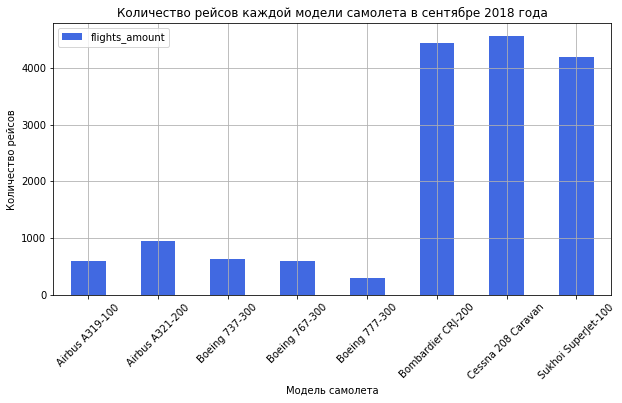

In [7]:
# построим график, на котором будет видно количество рейсов каждой модели самолета в сентябре 2018 года:
flights_amount.plot(kind='bar', color='royalblue', title='Количество рейсов каждой модели самолета в сентябре 2018 года',
                         x = 'model', grid=True, figsize=(10, 5), rot = 45)
plt.xlabel("Модель самолета")
plt.ylabel('Количество рейсов')
plt.show()

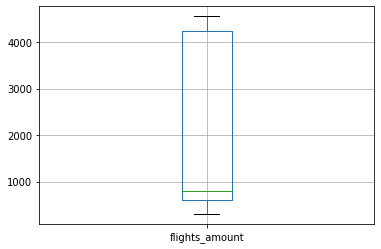

In [8]:
#  и построим "ящик с усами" по количеству рейсов моделей самолетов:
flights_amount.boxplot(column='flights_amount')
plt.show()

Больше всего рейсов в авиакомпании "F9" делают маленькие самолеты Cessna 208 Caravan (вместимость 14 человек) и Bombardier CRJ-200 (вместимость 52 человека). Малое количество пассажиров объясняет большое количество рейсов. Меньше всего рейсов делает Boeing 777-300, вместимость которого - 550 человек. При этом слишком большого или слишком малого количества рейсов не наблюдается.

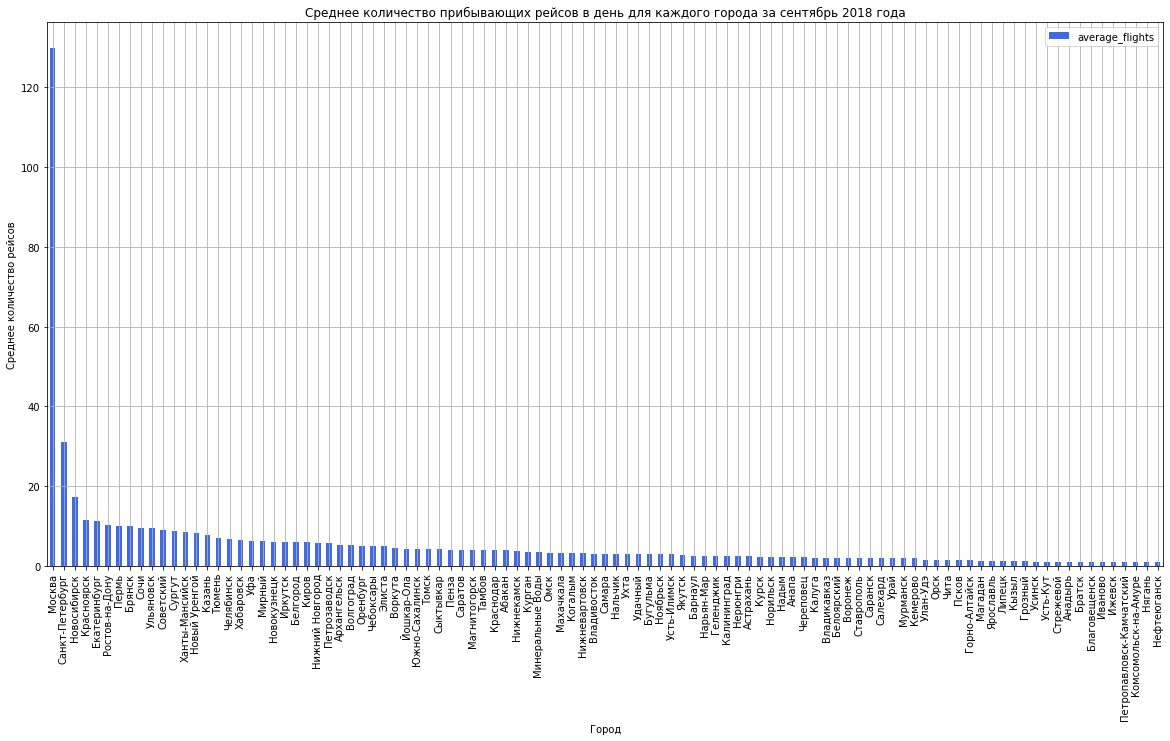

In [9]:
# построим график, на котором будет видно среднее количество прибывающих рейсов в день для каждого города за сентябрь 2018 года:
average_flights.sort_values('average_flights', ascending=False).plot(kind='bar', color='royalblue',
                            title='Среднее количество прибывающих рейсов в день для каждого города за сентябрь 2018 года',
                            x = 'city', grid=True, figsize=(20, 10), rot = 90)
plt.xlabel("Город")
plt.ylabel('Среднее количество рейсов')
plt.show()

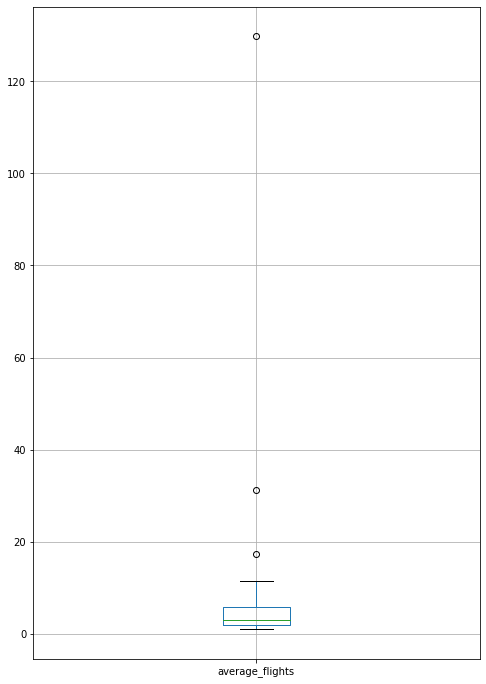

In [10]:
#  и построим "ящик с усами" по среднему количеству прибывающих рейсов в день для каждого города:
average_flights.sort_values('average_flights', ascending=False).boxplot(column='average_flights', figsize = (8, 12))
plt.show()

Типичное количество прибывающих рейсов в день для каждого города за сентябрь 2018 года в авиакомпании "F9" - 3 рейса. Сильно отличаются от этого количества 3 города - Москва, Санкт-Петербург и Новосибирск.

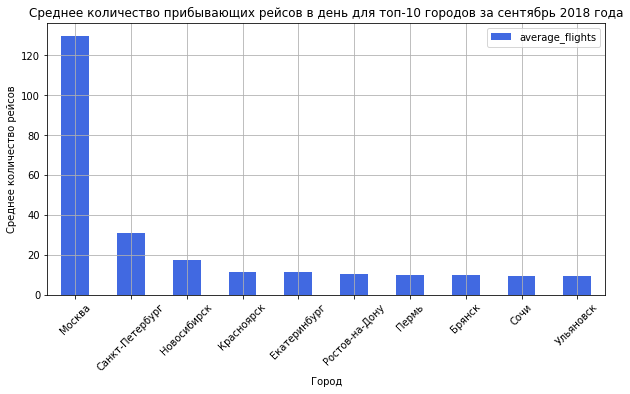

In [11]:
# построим график, на котором будет видно среднее количество прибывающих рейсов в день для топ-10 городов за сентябрь 2018 года:
average_flights.sort_values('average_flights', ascending=False).head(10).plot(kind='bar', color='royalblue',
                            title='Среднее количество прибывающих рейсов в день для топ-10 городов за сентябрь 2018 года',
                         x = 'city', grid=True, figsize=(10, 5), rot = 45)
plt.xlabel("Город")
plt.ylabel('Среднее количество рейсов')
plt.show()

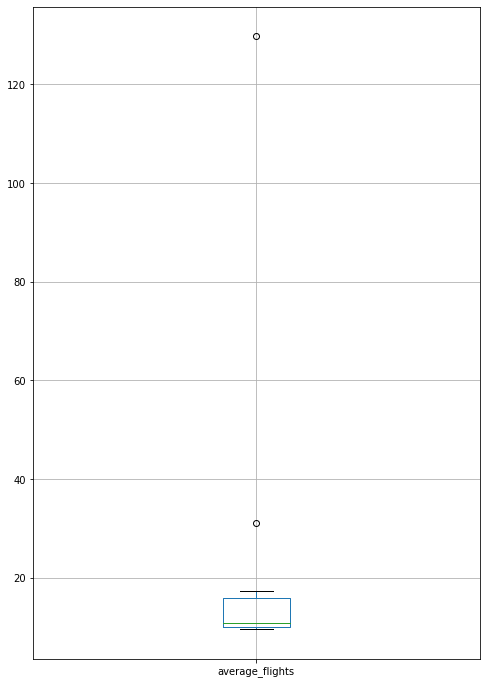

In [12]:
#  и построим "ящик с усами" по среднему количеству прибывающих рейсов в день для топ-10 городов:
average_flights.sort_values('average_flights', ascending=False).head(10).boxplot(column='average_flights', figsize = (8, 12))
plt.show()

А для топ-10 городов типичное количество прибывающих рейсов в день за сентябрь 2018 года в авиакомпании "F9" - 11 рейсов. При 
этом среднее количество рейсов Москвы и Санкт-Петербурга даже для топ-10 можно считать выбросом.